    004_221118_gonode4_socar_zone
       data : /aiffel/aiffel/000_aiffelthon_230111/3김연수/002_data_dir/004_node_data/20210823_socar_zone.csv

In [10]:
#1. package load
import requests
import json
import os
import math
import time
import numpy as np
import pandas as pd
import geopandas as gpd
import pyproj
import folium
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from IPython.display import Image

from shapely.geometry import mapping, shape, Point, Polygon, LineString
from folium import plugins
from folium.plugins import MarkerCluster, HeatMap

import warnings
warnings.filterwarnings(action='ignore') 

print(pd.__version__)
print(gpd.__version__)
print(folium.__version__)

1.3.3
0.10.1
0.12.1


    2. 프로젝트(1) 서울시 쏘카존 데이터를 활용한 시각화
       1) data load : socar zone data
       2) 시각화
          - base nap : 서울시 중심부 위도, 경도
          - MarkerCluster 객체 
          - map draw

In [3]:
#2. 프로젝트(1)  ... data load
path = os.getenv('HOME') + '/aiffel/000_aiffelthon_230111/3김연수/002_data_dir/004_node_data/20210823_socar_zone.csv'

socar_zone_info_df = pd.read_csv(path)
socar_zone_info_df.head()

,zone_name,lng,lat,region1,region2,region3
0,비전2 파출소사거리,127.102939,36.995989,경기도,평택시,비전동
1,수원시청역 9번출구,127.032953,37.262378,경기도,수원시 팔달구,인계동
2,목포 상동현대아파트 앞,126.415655,34.811289,전라남도,목포시,상동
3,단국대 산학협력관 앞,127.166626,36.832965,충청남도,천안시 동남구,신부동
4,목원대학교 앞,127.337858,36.329906,대전광역시,서구,도안동


In [4]:
socar_zone_info_df[socar_zone_info_df['region1'] == '서울특별시']

,zone_name,lng,lat,region1,region2,region3
7,신사역 5번출구,127.017639,37.517559,서울특별시,서초구,잠원동
13,나라키움 여의도빌딩,126.931243,37.518222,서울특별시,영등포구,여의도동
14,NC백화점 구로점,126.883313,37.500797,서울특별시,구로구,구로동
22,구의동(와이퍼),127.092187,37.538704,서울특별시,광진구,구의동
25,구로역 광장 옆,126.881822,37.503863,서울특별시,구로구,신도림동
...,...,...,...,...,...,...
4311,애오개역 아이파크,126.956010,37.553803,서울특별시,마포구,아현동
4312,홍대입구역 6번출구,126.928731,37.556668,서울특별시,마포구,동교동
4322,도봉보건소 교차로,127.038731,37.656392,서울특별시,도봉구,쌍문동
4323,서울숲역 5번출구(D타워),127.044386,37.544701,서울특별시,성동구,성수동1가


In [5]:
seoul_group_data = socar_zone_info_df.loc[socar_zone_info_df['region1'] == '서울특별시'].groupby('region2')['region2'].count()

In [6]:
seoul_group_data

region2
강남구     109
강동구      58
강북구      29
강서구      74
관악구      43
광진구      37
구로구      56
금천구      61
노원구      52
도봉구      30
동대문구     40
동작구      52
마포구      85
서대문구     51
서초구     164
성동구      56
성북구      45
송파구      65
양천구      46
영등포구     66
용산구      43
은평구      73
종로구      42
중구       59
중랑구      41
Name: region2, dtype: int64

    2. 프로젝트(1) 서울시 쏘카존 데이터를 활용한 시각화
       1) data load : socar zone data
       2) 시각화

In [7]:
#2. 프로젝트(1)  # base nap : 서울시 중심부 위도, 경도
center = [37.541, 126.986]

map = folium.Map(
    location=center,
    zoom_start=10,
    )
print('슝~')

슝~


In [8]:
#2. 프로젝트(1)  # MarkerCluster 객체 
marker_cluster = MarkerCluster().add_to(map)

#maker 객체 추가
for idx, row in socar_zone_info_df.iterrows():
    try:
        folium.Marker(
            location=[socar_zone_info_df.loc[idx, "lat"], socar_zone_info_df.loc[idx, "lng"]],
            popup=socar_zone_info_df.loc[idx, "zone_name"],
            icon=folium.Icon(color="cadetblue", icon="car", prefix="fa")            
        ).add_to(marker_cluster)
    except:
        pass

print('슝~')

슝~


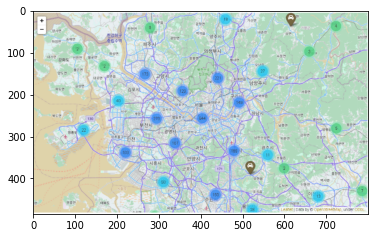

In [11]:
#2. 프로젝트(1)  # map draw
#map

img_path = '/aiffel/aiffel/000_going_node/004_221118_gonode4_jone/re_proj1_map.PNG'
img_bgr  = cv2.imread(img_path)       
plt.imshow(img_bgr)                   
plt.show()  

    3. 프로젝트(2) 서울시 카페와 버스 정류장 밀도 데이터를 이용한 시각화
           1) 카페data 정리
              - data load
              - 카페data 전처리 : 업종data분류
              - 카페 위치데이터 리스트 만들기
           2) 버스data 정리
              - data load
              - 버스data 전처리 .. 컬럼명 변경
              - 버스 정류장 위치데이터 리스트 만들기
           3) 시각화 
              - Folium 초기 Map 객체 생성
              - 레이어 적용을 위한 그룹 만들기
              - 카페 밀도
              - 버스정류장 밀도
           4) 생성한 map 확인

In [9]:
#3. 프로젝트(2) ... 1) 카페data load
temp_seoul_store_df = pd.read_csv(os. getenv('HOME') + '/aiffel/socar_gis/data/seoul_store_info_202106.csv')

temp_seoul_store_df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
1,17174119,쓰리에프,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1159010700101390073009536,NaN,서울특별시 동작구 동작대로27가길 12,156816,7008.0,NaN,NaN,NaN,126.980952,37.487105
2,17174096,채움,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1111012400100580000017956,두산위브파빌리온,서울특별시 종로구 삼봉로 81,110858,3150.0,NaN,NaN,NaN,126.981794,37.572387


In [10]:
#3. 프로젝트(2) ... 1) 카페data 전처리 
seoul_cafe_store_df = temp_seoul_store_df[temp_seoul_store_df["상권업종소분류코드"] == "Q12A01"]

seoul_cafe_store_df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
28,20659878,커피빈,코리아대학로대명거리점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111017200100510000032165,NaN,서울특별시 종로구 대명길 25,110524,3078.0,NaN,3,NaN,127.000171,37.583149
111,20676428,요거프레소,쌍문점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1132010500100200000006625,NaN,서울특별시 도봉구 도당로 7,132030,1385.0,NaN,1,NaN,127.034746,37.658728
190,20695531,메머드커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1144012000103270015009846,NaN,서울특별시 마포구 와우산로 149,121836,4052.0,NaN,1,NaN,126.929692,37.554599
197,28491095,우성커피숍,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1147010300105140002010707,NaN,서울특별시 양천구 오목로 48,158090,8029.0,NaN,1,NaN,126.842935,37.522055
225,20815616,카페클럽,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1171010800100430006004404,NaN,서울특별시 송파구 동남로2길 3-6,138200,5805.0,NaN,1,NaN,127.122480,37.488907


In [11]:
#3. 프로젝트(2) ... 1) 카페data 전처리 확인 
seoul_cafe_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20481 entries, 28 to 315945
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     20481 non-null  int64  
 1   상호명        20481 non-null  object 
 2   지점명        7320 non-null   object 
 3   상권업종대분류코드  20481 non-null  object 
 4   상권업종대분류명   20481 non-null  object 
 5   상권업종중분류코드  20481 non-null  object 
 6   상권업종중분류명   20481 non-null  object 
 7   상권업종소분류코드  20481 non-null  object 
 8   상권업종소분류명   20481 non-null  object 
 9   표준산업분류코드   19124 non-null  object 
 10  표준산업분류명    19124 non-null  object 
 11  시도코드       20481 non-null  int64  
 12  시도명        20481 non-null  object 
 13  시군구코드      20481 non-null  int64  
 14  시군구명       20481 non-null  object 
 15  행정동코드      20481 non-null  int64  
 16  행정동명       20478 non-null  object 
 17  법정동코드      20481 non-null  int64  
 18  법정동명       20481 non-null  object 
 19  지번코드       20481 non-null  int64  
 20  대지구분

In [12]:
#3. 프로젝트(2) ... 1) 카페data 전처리 ... # 카페 위치데이터 리스트 만들기
seoul_cafe_location_data = [[row["위도"], row["경도"]] for _, row in seoul_cafe_store_df.iterrows()]

print("슝~")

슝~


In [13]:
#3. 프로젝트(2) ... 2) 버스data load
path = os.getenv('HOME') + '/aiffel/socar_gis/data/seoul_bus_line_info.csv'
bus_line_info_df =  pd.read_csv(path)
bus_line_info_df.head()

,노선ID,노선명,순번,구간ID,정류소ID,ARS-ID,정류소명,X좌표,Y좌표
0,100100124,0017,1,0,102000271,3689,청암자이아파트,126.946517,37.534363
1,100100124,0017,2,102700549,102000204,3298,청암동강변삼성아파트,126.949304,37.533961
2,100100124,0017,3,102700550,102000227,3321,청심경로당,126.950449,37.533744
3,100100124,0017,4,102700551,102000210,3304,원효2동주민센터,126.950904,37.534278
4,100100124,0017,5,102700552,102000212,3306,산천동,126.953984,37.535420


In [14]:
#3. 프로젝트(2) ... 2) 버스data 전처리 .. 컬럼명 변경
bus_line_info_df.rename(
    columns={
        "Y좌표": "lat",
        "X좌표": "lng",
    },
    inplace=True
)

bus_line_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39363 entries, 0 to 39362
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   노선ID    39363 non-null  int64  
 1   노선명     39363 non-null  object 
 2   순번      39363 non-null  int64  
 3   구간ID    39363 non-null  int64  
 4   정류소ID   39363 non-null  int64  
 5   ARS-ID  39363 non-null  int64  
 6   정류소명    39363 non-null  object 
 7   lng     39363 non-null  float64
 8   lat     39363 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 2.7+ MB


In [15]:
#3. 프로젝트(2) ... 2) 버스 정류장 위치데이터 리스트 만들기
bus_station_location_data = [[row["lat"], row["lng"]] for _, row in bus_line_info_df.iterrows()]
print('슝~')
#bus_station_location_data

슝~


In [16]:
#3. 프로젝트(2) ... 3)시각화  ... # Folium 초기 Map 객체 생성 

center = [37.541, 126.986]

map = folium.Map(
    location=center,
    tiles= "Stamen Terrain", 
    zoom_start= 15
)
print('슝~')

슝~


In [17]:
#3. 프로젝트(2) ... 3) 시각화 # 레이어 적용을 위한 그룹 만들기
# 대표 그룹 만들기
fg = folium.FeatureGroup(name="groups")
map.add_child(fg)

# 카페 그룹 만들기
cafe = plugins.FeatureGroupSubGroup(fg, "cafe_density")
map.add_child(cafe)

# 버스정류장 그룹 만들기
bus = plugins.FeatureGroupSubGroup(fg, "bus_group")
map.add_child(bus)

# 레이어 콘트롤 박스 만들기
folium.LayerControl(collapsed=False).add_to(map)

In [18]:
#3. 프로젝트(2) ... 3) 시각화 .. # 카페 밀도
plugins.HeatMap(seoul_cafe_location_data).add_to(cafe)

In [19]:
#3. 프로젝트(2) ... 3) 시각화 ... # 버스정류장 밀도
plugins.HeatMap(bus_station_location_data).add_to(bus)

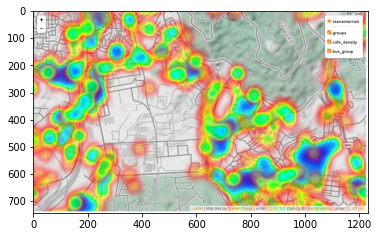

In [12]:
#3. 프로젝트(2) ... 3) 시각화 ... # 생성한 맵 확인
#map

img_path = '/aiffel/aiffel/000_going_node/004_221118_gonode4_jone/proj2_map.PNG'
img_bgr  = cv2.imread(img_path)       
plt.imshow(img_bgr)                   
plt.show()  

    4. 프로젝트(3) 시각화 자료에 쏘카존 데이터 추가하기
        1) 초기 Map 객체를 생성
        2) 레이어 적용을 위한 그룹 만들기
        3) 쏘카존 마커 클러스터 만들기
        4) 카페 밀도
        5) 버스정류장 밀도
        6) 생성한 map 확인

In [21]:
#4. 프로젝트(3) # 1)Folium 초기 Map 객체를 생성 합니다.

# 서울시 중심부 위도, 경도
center = [37.541, 126.986]

map = folium.Map(
    location=center,
    zoom_start=10,
    )
print('슝~')

슝~


In [22]:
#4. 프로젝트(3)  .. # 2)레이어 적용을 위한 그룹 만들기
# 대표 그룹 만들기
fg = folium.FeatureGroup(name="groups")
map.add_child(fg)

# 카페 그룹 만들기
cafe = plugins.FeatureGroupSubGroup(fg, "cafe_density")
map.add_child(cafe)

# 버스정류장 그룹 만들기
bus = plugins.FeatureGroupSubGroup(fg, "bus_group")
map.add_child(bus)

# 쏘카 그룹 만들기
soacr = plugins.FeatureGroupSubGroup(fg, "socar_zone")
map.add_child(soacr)

# 레이어 콘트롤 박스 만들기
folium.LayerControl(collapsed=False).add_to(map)

In [23]:
#4. 프로젝트(3)  ..3) 쏘카존 마커 클러스터 만들기
socar_zone_data = [[row["lat"], row["lng"]] for _, row in socar_zone_info_df.iterrows()]
popups = [socar_zone_info_df.loc[idx, "zone_name"] for idx, row in socar_zone_info_df.iterrows()] #popup시 표시 될 주소

mg = plugins.MarkerCluster( socar_zone_data, popups=popups,control=False)

#map.add_child(mg)
 

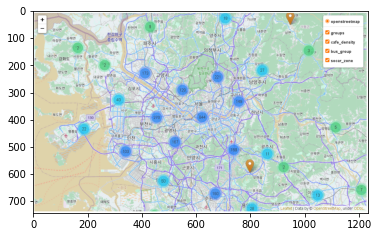

In [14]:
img_path = '/aiffel/aiffel/000_going_node/004_221118_gonode4_jone/proj3_1_map.PNG'
img_bgr  = cv2.imread(img_path)       
plt.imshow(img_bgr)                   
plt.show() 

In [24]:
#4. 프로젝트(3)  ..#4) 카페 밀도
plugins.HeatMap(seoul_cafe_location_data).add_to(cafe)

In [25]:
#4. 프로젝트(3)  ..#5) 버스정류장 밀도
plugins.HeatMap(bus_station_location_data).add_to(bus)

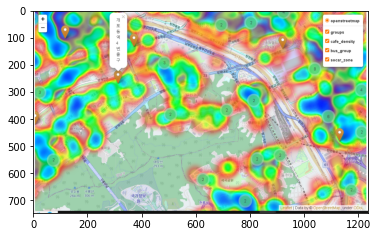

In [15]:
#4. 프로젝트(3)  ..6) 생성한 map 확인

#map
img_path = '/aiffel/aiffel/000_going_node/004_221118_gonode4_jone/proj3_2_map.PNG'
img_bgr  = cv2.imread(img_path)       
plt.imshow(img_bgr)                   
plt.show()  

    5. socar_zone 분석 : 서울시 분석
       1) 서울시 쏘카존 밀도 분석   : 서초구 집중 >> 통,폐합 조정 필요
           - 산포도 확인 : bus, 카페, 쏘카존
           - 구별 쏘카존 밀도 분석 : 서초구 집중
       2) 서울시 구별 인구밀도 분석 : 
           - 강서구,성동구,송파구 인구밀도가 높음 
           - 쏘카존 신설 분석 필요
       3) 성동구기준 쏘카존 신설 분석 
          - 대단지 아파트에 설치된 쏘카존 분석 결과 다음의 아파트 쏘카존 신설 필요
            . 래미안 옥수 리버젠	 ( 서울특별시 성동구 매봉길 15 )
            . e편한세상 옥수 파크힐스( 서울특별시 성동구 매봉길 50 )

In [27]:
#5 socar_zone 분석  .. bus scatter
bus_station_data = pd.DataFrame(bus_station_location_data,columns=['lat', 'lng'])

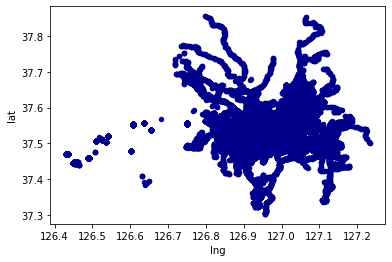

In [28]:
#5 socar_zone 분석  .. bus scatter
ax1 = bus_station_data.plot.scatter(x='lng',y='lat',c='DarkBlue')

In [29]:
#5 socar_zone 분석  .. caffe scatter
seoul_cafe__data = pd.DataFrame(seoul_cafe_location_data,columns=['lat', 'lng'])

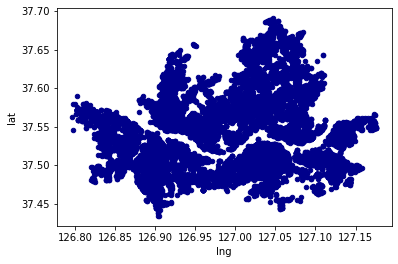

In [30]:
#5 socar_zone 분석  .. caffe scatter
ax1 = seoul_cafe__data.plot.scatter(x='lng',y='lat',c='DarkBlue')

In [31]:
#5 socar_zone 분석  .. socar scatter
socar_data = pd.DataFrame(socar_zone_data,columns=['lat', 'lng'])

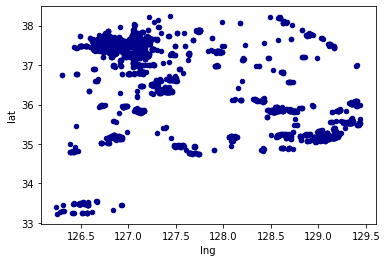

In [32]:
#5 socar_zone 분석  .. socar scatter
ax1 = socar_data.plot.scatter(x='lng',y='lat',c='DarkBlue')

In [33]:
#5 socar_zone 분석  .. 서울시 구별 분석
import requests
import json

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [34]:
#5 socar_zone 분석  .. 서울시 구별 지도 생성
map = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(map)

In [35]:
#5 socar_zone 분석  .. 서울시 구별 socar 밀도 확인
map = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(map)

map.choropleth(geo_data=seoul_geo,
             data=seoul_group_data, 
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 socar zone 수"
            )
#map

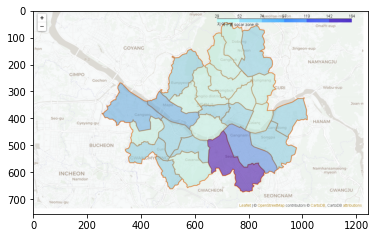

In [18]:
img_path = '/aiffel/aiffel/000_going_node/004_221118_gonode4_jone/proj4_4_map.PNG'
img_bgr  = cv2.imread(img_path)       
plt.imshow(img_bgr)                   
plt.show()  

In [36]:
#5 socar_zone 분석  .. 서울시 구별 인구 밀도 확인
path = os.getenv('HOME') + '/aiffel/000_going_node/004_221118_gonode4_jone/final_seoul_person.csv'

seoul_population_df = pd.read_csv(path)
seoul_population_df.head()

,gu,dong,person,space,dencity
0,종로구,사직동,9636,1.23,7834
1,종로구,삼청동,2739,1.49,1838
2,종로구,부암동,9782,2.27,4309
3,종로구,평창동,18329,8.87,2066
4,종로구,무악동,8297,0.36,23047


In [37]:
#5 socar_zone 분석  .. 서울시 구별 인구 밀도 sum
seoul_group_data = seoul_population_df.loc[seoul_population_df['gu'] != '서울특별시'].groupby('gu')['person'].sum()

In [38]:
#5 socar_zone 분석  .. 서울시 구별 인구 밀도 sum
seoul_group_data

gu
강남구     537800
강동구     466472
강북구     302563
강서구     579768
관악구     499449
광진구     352627
구로구     421163
금천구     244891
노원구     514946
도봉구     319373
동대문구    352006
동작구     394364
마포구     378686
서대문구    315659
서초구     416167
성동구     585344
성북구     440142
송파구     663965
양천구     450487
영등포구    400908
용산구     237285
은평구     477173
종로구     153789
중구      131787
중랑구     391885
Name: person, dtype: int64

In [39]:
#5 socar_zone 분석  .. 서울시 구별 인구 밀도 graph
map = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(map)

map.choropleth(geo_data=seoul_geo,
             data=seoul_group_data, 
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 인구 수"
            )
#map
#강서구,성동구,송파구 sorcar zone 증설 필요성, 서초구 쏘카 통폐합 조정 필요

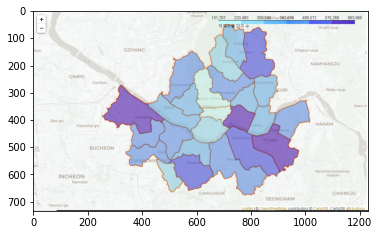

In [19]:
img_path = '/aiffel/aiffel/000_going_node/004_221118_gonode4_jone/proj4_5_map.PNG'
img_bgr  = cv2.imread(img_path)       
plt.imshow(img_bgr)                   
plt.show()  

In [40]:
#5 socar_zone 분석  .. 서울시 구별 인구 밀도 확인
path = os.getenv('HOME') + '/aiffel/000_going_node/004_221118_gonode4_jone/sungdong1.csv'

sungdong_df = pd.read_csv(path)
sungdong_df.head()

,apt,address
0,래미안 옥수 리버젠,서울특별시 성동구 매봉길 15
1,옥수동 삼성아파트,서울특별시 성동구 독서당로 218
2,금호동 벽산아파트,서울특별시 성동구 금호로 100
3,금호동 대우아파트,서울특별시 성동구 독서당로 272
4,행당대림아파트,서울특별시 성동구 행당로 87


In [41]:
#5 socar_zone 분석  .. 성동구 쏘카존 신설 제안 ### SGIS ACCESS TOKEN을 리턴 해주는 함수
def get_access_token(consumer_key, consumer_secret) -> None:
    temp_res = requests.get(
        url="https://sgisapi.kostat.go.kr/OpenAPI3/auth/authentication.json",
        params={
            "consumer_key": consumer_key,
            "consumer_secret": consumer_secret
        }
    )
  
    access_token = temp_res.json()["result"]["accessToken"]
  
    return access_token

print("슝~")

슝~


In [42]:
#5 socar_zone 분석  .. 성동구 쏘카존 신설 제안 ## SGIS access_token 가져오기
consumer_key  = '9e3111dfc4de422eac60'
consumer_secret = '6fa0e3a98f9143e89904'

access_token = get_access_token(consumer_key, consumer_secret)

## 주소를 입력해 주소의 데이터를 DataFrame으로 가지고오는 함수
def get_adress_info(access_token, address) -> None:
    url="https://sgisapi.kostat.go.kr/OpenAPI3/addr/geocode.json"
    params={
        "accessToken": access_token,
        "address": address
    }

    temp_res = requests.get(
        url=url,
        params=params
    ).json()["result"]["resultdata"]

    temp_df = pd.DataFrame(temp_res)

    return temp_df

print("슝~")

슝~


In [43]:
#5 socar_zone 분석  .. 성동구 쏘카존 신설 제안 ### UTM-K 좌표계를 WGS84 좌표계로 변환하는 함수
# 좌표계별 EPSG CODE 종류: UTM-K 좌표계(EPSG:5179), WGS84(위/경도 좌표계, EPSG:4326)

def utmk_to_wgs84(utmk_x, utmk_y) -> None:
    utmk_proj = pyproj.Proj(init="EPSG:5179") # UTM-K 좌표계 정의
    wgs84_proj = pyproj.Proj(init="EPSG:4326") # WGS84 좌표계 정의
    
    # 좌표 변환 수헹
    wgs84_x, wgs84_y = pyproj.transform(utmk_proj, wgs84_proj, utmk_x, utmk_y)
    # print(f"UTM-K 위도: {utmk_y} -> WGS84 위도: {wgs84_y} \nUTM-K 경도: {utmk_x} -> WGS84 경도: {wgs84_x}")
    
    
    return wgs84_x, wgs84_y

print("슝~")

슝~


In [44]:
#5 socar_zone 분석  .. 성동구 쏘카존 신설 제안  ## SGIS 좌표변환 API를 활용한 좌표변환 함수 정의
def get_transcoord(access_token, src, dst, posX, posY) -> None:
    url="https://sgisapi.kostat.go.kr/OpenAPI3/transformation/transcoord.json"
    params={
        "accessToken": access_token,
        "src": src, # 현재 좌표체계
        "dst": dst, # 변환할 좌표체계
        "posX": posX, # 변환할 좌표 X값
        "posY":	posY # 변환할 좌표 Y값
    }

    temp_dict = requests.get(
        url=url,
        params=params
    ).json()["result"]

    return temp_dict["posX"], temp_dict["posY"] # 변환된 좌푯값 딕셔너리의 value 리턴

print("슝~")

슝~


In [45]:
#5 socar_zone 분석  .. 성동구 쏘카존 신설 제안 .. 대단지 아파트 좌표 

sungdong_df.insert(2,"sido_nm", "nan")
sungdong_df.insert(3,"sgg_nm", "nan")
sungdong_df.insert(4,"adm_nm", "nan")
sungdong_df.insert(5,"x", "nan")
sungdong_df.insert(6,"y", "nan")
sungdong_df.insert(7,"wgs84_x", "nan")
sungdong_df.insert(8,"wgs84_y", "nan")
sungdong_df.insert(9,"transcoord_x", "nan")
sungdong_df.insert(10,"transcoord_y", "nan")

for i in range(len(sungdong_df)):
    address_df = get_adress_info(access_token, sungdong_df.loc[i]['address'] )

    sungdong_df.loc[i]["sido_nm"] = address_df.loc[0]["sido_nm"]
    sungdong_df.loc[i]["sgg_nm"]  = address_df.loc[0]["sgg_nm"]
    sungdong_df.loc[i]["adm_nm"]  = address_df.loc[0]["adm_nm"]
    sungdong_df.loc[i]["x"]       = address_df.loc[0]["x"]
    sungdong_df.loc[i]["y"]      = address_df.loc[0]["y"]
    
    # 변환후 데이터 프레임에 변환된 좌표 컬럼 추가하기
    sungdong_df.loc[i][["wgs84_x", "wgs84_y"]] = utmk_to_wgs84(sungdong_df.loc[i, "x"], sungdong_df.loc[i, "y"])
    sungdong_df.loc[i][["transcoord_x", "transcoord_y"]] = get_transcoord(access_token, "EPSG:5179", "EPSG:4326", sungdong_df.loc[0, "x"], sungdong_df.loc[0, "y"])

sungdong_df

,apt,address,sido_nm,sgg_nm,adm_nm,x,y,wgs84_x,wgs84_y,transcoord_x,transcoord_y
0,래미안 옥수 리버젠,서울특별시 성동구 매봉길 15,서울특별시,성동구,옥수동,957067.127356724,1949577.08614197,127.013992,37.544526,127.013992,37.544526
1,옥수동 삼성아파트,서울특별시 성동구 독서당로 218,서울특별시,성동구,옥수동,957203.983390306,1949366.21587163,127.015554,37.542631,127.013992,37.544526
2,금호동 벽산아파트,서울특별시 성동구 금호로 100,서울특별시,성동구,금호1가동,958337.557657381,1950164.11254867,127.02834,37.549875,127.013992,37.544526
3,금호동 대우아파트,서울특별시 성동구 독서당로 272,서울특별시,성동구,금호4가동,957485.233050935,1949743.87495241,127.018715,37.546048,127.013992,37.544526
4,행당대림아파트,서울특별시 성동구 행당로 87,서울특별시,성동구,행당2동,958359.925197546,1950988.55044744,127.028546,37.557307,127.013992,37.544526
5,행당 한진타운,서울특별시 성동구 행당동 행당로 82,서울특별시,성동구,행당2동,958443.615372286,1950950.32213763,127.029496,37.556966,127.013992,37.544526
6,행당 한신아파트,서울특별시 성동구 행당동 380,서울특별시,성동구,행당1동,959227.277018434,1950744.09467496,127.03838,37.555142,127.013992,37.544526
7,서울숲리버뷰자이,서울특별시 성동구 고산자로2길 65,서울특별시,성동구,행당1동,959221.558816566,1950649.66566571,127.03832,37.554291,127.013992,37.544526
8,e편한세상 금호 파크힐스,서울특별시 성동구 금호로 140,서울특별시,성동구,금호1가동,957895.638088863,1950771.90168649,127.023302,37.555333,127.013992,37.544526
9,e편한세상 옥수 파크힐스,서울특별시 성동구 매봉길 50,서울특별시,성동구,옥수동,957134.099117376,1949983.37621438,127.014727,37.548191,127.013992,37.544526


In [46]:
#5 socar_zone 분석  .. 성동구 쏘카존 신설 제안 ..  # Folium 초기 Map 객체 생성
# 초기 Map 메소드에는 초기 중심값 좌표가 들어가야 합니다.  
base_map = folium.Map(
    location=[37.566345, 126.977893]
)


In [47]:
#5 socar_zone 분석  .. 성동구 쏘카존 신설 제안 .. 대단지 아파트 좌표  # 지도에 Circle 찍기
for index_num in range(len(sungdong_df)):
    folium.Circle(
        location=[sungdong_df.loc[index_num, "wgs84_y"], sungdong_df.loc[index_num, "wgs84_x"]],
        radius=100,
        color="blue",
        popup=sungdong_df.loc[index_num, "adm_nm"]
    ).add_to(base_map)

#base_map

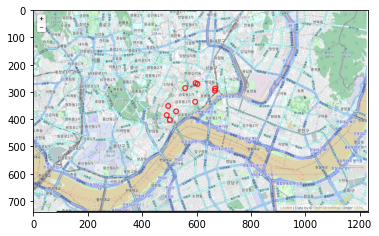

In [20]:
img_path = '/aiffel/aiffel/000_going_node/004_221118_gonode4_jone/proj4_6_map.PNG'
img_bgr  = cv2.imread(img_path)       
plt.imshow(img_bgr)                   
plt.show()  

In [48]:
#5 socar_zone 분석  .. 성동구 쏘카존 신설 제안 .. 대단지 아파트 와 쏘카존 비교 
marker_cluster = MarkerCluster().add_to(base_map)

#maker 객체 추가
for idx, row in socar_zone_info_df.iterrows():
    try:
        folium.Marker(
            location=[socar_zone_info_df.loc[idx, "lat"], socar_zone_info_df.loc[idx, "lng"]],
            popup=socar_zone_info_df.loc[idx, "zone_name"],
            icon=folium.Icon(color="cadetblue", icon="car", prefix="fa")            
        ).add_to(marker_cluster)
    except:
        pass

#base_map

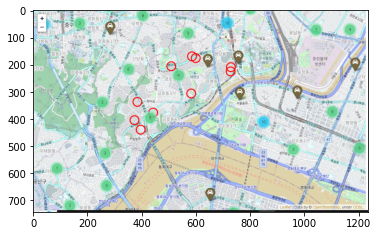

In [21]:
img_path = '/aiffel/aiffel/000_going_node/004_221118_gonode4_jone/proj4_7_map.PNG'
img_bgr  = cv2.imread(img_path)       
plt.imshow(img_bgr)                   
plt.show()  